# Introduction to AI - Part1- Question1

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
#Importing the dataset
data = pd.read_csv('coursework1.csv')

In [4]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028


In [5]:
#Checking null values

In [7]:
len(data['NOX'].value_counts())

11996

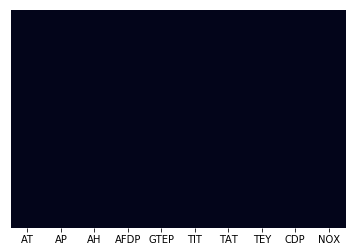

In [6]:
sns.heatmap(data=data.isnull(), yticklabels=False, cbar=False)

The above graph represents that there are no null values in the dataset

Full forms of the terms - 

AT   - Ambient Temperature 

AP   - Ambient Pressure 

AH   - Ambient Humidity

AFDP - Air Filter Difference Pressure

GTEP - Gas Turbine Exhause Pressure

TIT  - Turbine Inlet Temperature

TAT  - Turbine After Temperature

TEY  - Turbine Energy Yield

CDP  - Compressure Discharge Pressure

NOX  - Nitrogen Oxide values 

In [7]:
#Regression Problem

In [8]:
#Splitting the dataset
X = data.iloc[:, : -1]
Y = data.iloc[:, -1]

In [9]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910


In [10]:
Y.head()

0    81.952
1    82.377
2    83.776
3    82.505
4    82.028
Name: NOX, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [14]:
#Splitting the data into training, testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

# Optimisation of a Model

In [15]:
from sklearn.model_selection import GridSearchCV

The parameters will be later passed to a variable applied to the particular model.

# Linear Regression

In [16]:
linear = LinearRegression()

In [17]:
linear.fit(X_train, Y_train)

LinearRegression()

# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridge = Ridge()

In [20]:
ridge.fit(X_train, Y_train)

Ridge()

# Optimising Ridge Regression

In [21]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [22]:
ridge_param = dict(alpha=alpha)

In [23]:
grid = GridSearchCV(estimator=ridge, param_grid=ridge_param, cv=10, return_train_score=True, scoring='r2', verbose=1, n_jobs=-1)

In [24]:
ridge_result = grid.fit(X_train, Y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.5s finished


In [25]:
ridge_train_scores_mean = ridge_result.cv_results_["mean_train_score"]
ridge_test_scores_mean = ridge_result.cv_results_["mean_test_score"]

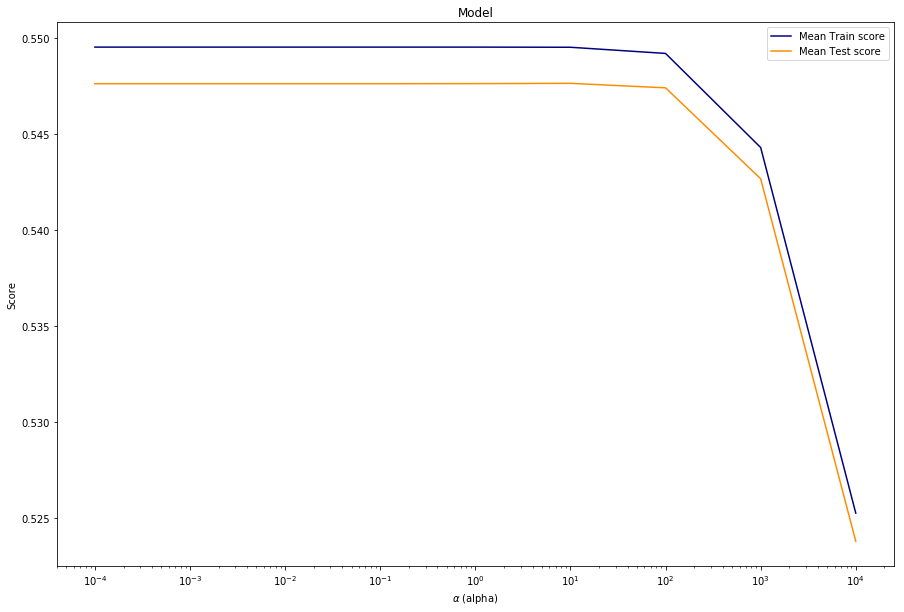

In [26]:
plt.figure(figsize=(15,10))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alpha, ridge_train_scores_mean, label='Mean Train score', color='navy')

plt.semilogx(alpha, ridge_test_scores_mean,label='Mean Test score', color='darkorange')

plt.legend(loc='best')
plt.show()

In [27]:
print('Best cross-validation Score : {:.2f}'.format(ridge_result.best_score_))
print('Best Params: ', ridge_result.best_params_)

Best cross-validation Score : 0.55
Best Params:  {'alpha': 10}


In [28]:
#New Ridge Regression model

In [29]:
n_ridge = Ridge(alpha=10)

In [30]:
n_ridge.fit(X_train, Y_train)

Ridge(alpha=10)

# Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

In [32]:
lasso = Lasso()

In [33]:
lasso.fit(X_train, Y_train)

Lasso()

# Optimising Lasso Regression

In [34]:
lasso_param = dict(alpha=alpha)

In [35]:
grid_lasso = GridSearchCV(estimator=lasso, param_grid=lasso_param, cv=10, return_train_score=True, scoring='r2', verbose=1, n_jobs=-1)

In [36]:
lasso_result = grid_lasso.fit(X_train, Y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.6s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276151.4390225443, tolerance: 123.57764957453675
  positive)


In [37]:
lasso_train_scores_mean = lasso_result.cv_results_["mean_train_score"]
lasso_test_scores_mean = lasso_result.cv_results_["mean_test_score"]

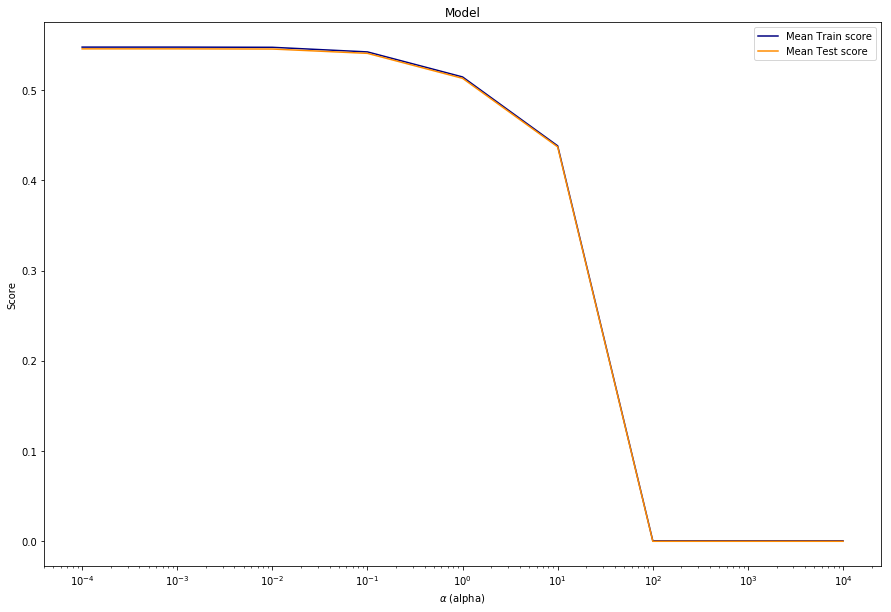

In [38]:
plt.figure(figsize=(15,10))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

# plot train scores
plt.semilogx(alpha, lasso_train_scores_mean, label='Mean Train score', color='navy')

plt.semilogx(alpha, lasso_test_scores_mean,label='Mean Test score', color='darkorange')

plt.legend(loc='best')
plt.show()

In [39]:
print('Best cross-validation Score : {:.2f}'.format(lasso_result.best_score_))
print('Best Params: ', lasso_result.best_params_)

Best cross-validation Score : 0.55
Best Params:  {'alpha': 0.001}


In [40]:
#New Lasso Regression model

In [41]:
n_lasso = Lasso(alpha=0.001)

In [42]:
n_lasso.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276151.4390225443, tolerance: 123.57764957453675
  positive)


Lasso(alpha=0.001)

# Dummy 

In [43]:
linear_dummy_mean = DummyRegressor(strategy='mean')

In [44]:
linear_dummy_mean.fit(X_train, Y_train)

DummyRegressor()

In [45]:
linear_dummy_median = DummyRegressor(strategy='median')

In [46]:
linear_dummy_median.fit(X_train, Y_train)

DummyRegressor(strategy='median')

# Predictions

In [47]:
linear_pred = linear.predict(X_test)

In [48]:
dummy_mean_pred = linear_dummy_mean.predict(X_test)
dummy_median_pred = linear_dummy_median.predict(X_test)

Mean: This is the default strategy used by the Dummy Regressor. It always predicts the mean of the training target values.

Median: This is used to predict the median of the training target values.

Quantile: It is used to predict a particular quantile of training target values provided the quantile parameter is used along with it.

Constant: This is generally used to predict a specific custom value that is provided and the constant parameter must be mentioned.

In [49]:
ridge_pred = ridge.predict(X_test)

In [50]:
n_ridge_pred = n_ridge.predict(X_test)

In [51]:
lasso_pred = lasso.predict(X_test)

In [52]:
n_lasso_pred = n_lasso.predict(X_test)

# Coefficients

In [53]:
coefficients = pd.DataFrame()

In [54]:
coefficients['Linear Regression']        = [round(num, 2) for num in linear.coef_]
coefficients['Ridge Regression']         = [round(num, 2) for num in ridge.coef_]
coefficients['Optimal Ridge Regression'] = [round(num, 2) for num in n_ridge.coef_]
coefficients['Lasso Regression']         = [round(num, 2) for num in lasso.coef_]
coefficients['Optimal Lasso Regression'] = [round(num, 2) for num in n_lasso.coef_]

In [55]:
coefficients

,Linear Regression,Ridge Regression,Optimal Ridge Regression,Lasso Regression,Optimal Lasso Regression
0,-1.75,-1.75,-1.75,-1.22,-1.78
1,-0.26,-0.26,-0.25,-0.02,-0.21
2,-0.29,-0.29,-0.29,-0.27,-0.29
3,2.37,2.37,2.35,0.00,2.09
4,-3.28,-3.27,-3.19,-0.00,-1.68
5,1.73,1.73,1.73,0.00,1.27
6,-1.93,-1.93,-1.92,0.20,-1.21
7,-1.91,-1.91,-1.91,-0.13,-1.86
8,1.74,1.70,1.43,-0.00,5.09


# Metrics

In [56]:
print("Mean squared error (Dummy)               : {:.2f}".format(mean_squared_error(Y_test, dummy_mean_pred)))

print("Mean squared error (Linear model)        : {:.2f}".format(mean_squared_error(Y_test, linear_pred)))

print("Mean squared error (Ridge model)         : {:.2f}".format(mean_squared_error(Y_test, ridge_pred)))

print("Mean squared error (Optimal Ridge model) : {:.2f}".format(mean_squared_error(Y_test, n_ridge_pred)))

print("Mean squared error (Lasso model)         : {:.2f}".format(mean_squared_error(Y_test, lasso_pred)))

print("Mean squared error (Optimal Lasso model) : {:.2f}".format(mean_squared_error(Y_test, n_lasso_pred)))

Mean squared error (Dummy)               : 109.81
Mean squared error (Linear model)        : 49.44
Mean squared error (Ridge model)         : 49.44
Mean squared error (Optimal Ridge model) : 49.44
Mean squared error (Lasso model)         : 52.95
Mean squared error (Optimal Lasso model) : 49.67


In [57]:
print("Median absolute error (Dummy)               : {:.2f}".format(median_absolute_error(Y_test, dummy_median_pred)))

print("Median absolute error (Linear model)        : {:.2f}".format(median_absolute_error(Y_test, linear_pred)))

print("Median absolute error (Ridge model)         : {:.2f}".format(median_absolute_error(Y_test, ridge_pred)))

print("Median absolute error (Optimal Ridge model) : {:.2f}".format(median_absolute_error(Y_test, n_ridge_pred)))

print("Median absolute error (Lasso model)         : {:.2f}".format(median_absolute_error(Y_test, lasso_pred)))

print("Median absolute error (optimal Lasso model) : {:.2f}".format(median_absolute_error(Y_test, n_lasso_pred)))

Median absolute error (Dummy)               : 6.00
Median absolute error (Linear model)        : 3.13
Median absolute error (Ridge model)         : 3.13
Median absolute error (Optimal Ridge model) : 3.12
Median absolute error (Lasso model)         : 3.24
Median absolute error (optimal Lasso model) : 3.07


In [58]:
print("r2_score (dummy mean)          : {:.2f}".format(r2_score(Y_test, dummy_mean_pred)))

print("r2_score (dummy median)        : {:.2f}".format(r2_score(Y_test, dummy_median_pred)))

print("r2_score (linear model)        : {:.2f}".format(r2_score(Y_test, linear_pred)))

print("r2_score (ridge model)         : {:.2f}".format(r2_score(Y_test, ridge_pred)))

print("r2_score (optimal ridge model) : {:.2f}".format(r2_score(Y_test, n_ridge_pred)))

print("r2_score (lasso model)         : {:.2f}".format(r2_score(Y_test, lasso_pred)))

print("r2_score (Optimal lasso model) : {:.2f}".format(r2_score(Y_test, n_lasso_pred)))

r2_score (dummy mean)          : -0.00
r2_score (dummy median)        : -0.03
r2_score (linear model)        : 0.55
r2_score (ridge model)         : 0.55
r2_score (optimal ridge model) : 0.55
r2_score (lasso model)         : 0.52
r2_score (Optimal lasso model) : 0.55


# Visualising Errors

In [69]:
model = ['Dummy', 'Linear', 'Ridge','Optimal Ridge', 'Lasso', 'Optimal Lasso']

mean = [mean_squared_error(Y_test, dummy_mean_pred),
        mean_squared_error(Y_test, linear_pred),
        mean_squared_error(Y_test, ridge_pred),
        mean_squared_error(Y_test, n_ridge_pred),
        mean_squared_error(Y_test, lasso_pred),
        mean_squared_error(Y_test, n_lasso_pred)]

median = [median_absolute_error(Y_test, dummy_median_pred),
          median_absolute_error(Y_test, linear_pred),
          median_absolute_error(Y_test, ridge_pred),
          median_absolute_error(Y_test, n_ridge_pred),
          median_absolute_error(Y_test, lasso_pred),
          median_absolute_error(Y_test, n_lasso_pred)]

r2 = [r2_score(Y_test, dummy_mean_pred),
      r2_score(Y_test, linear_pred),
      r2_score(Y_test, ridge_pred),
      r2_score(Y_test, n_ridge_pred),
      r2_score(Y_test, lasso_pred),
      r2_score(Y_test, n_lasso_pred)]


In [70]:
error = pd.DataFrame(columns=['Model', 'MSE', 'MedAE', 'R2'])

In [71]:
error['Model'] = model
error['MSE'] = mean
error['MedAE'] = median
error['R2'] = r2

In [72]:
error

,Model,MSE,MedAE,R2
0,Dummy,109.812401,6.004500,-0.000073
1,Linear,49.440531,3.132885,0.549740
2,Ridge,49.440824,3.133029,0.549737
3,Optimal Ridge,49.443928,3.124245,0.549709
4,Lasso,52.954640,3.239912,0.517737
5,Optimal Lasso,49.666002,3.073591,0.547687


Text(0.5, 1.0, 'Mean Squared Error')

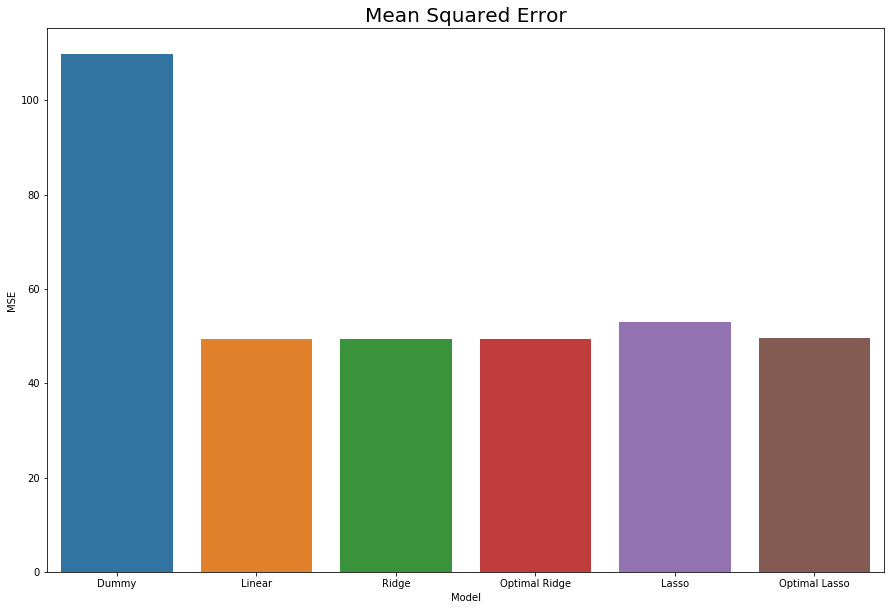

In [87]:
plt.figure(figsize=(15,10)).set
sns.barplot(x='Model', y='MSE', data=error)
plt.title('Mean Squared Error', fontsize=20)

Text(0.5, 1.0, 'Median Absolute Error')

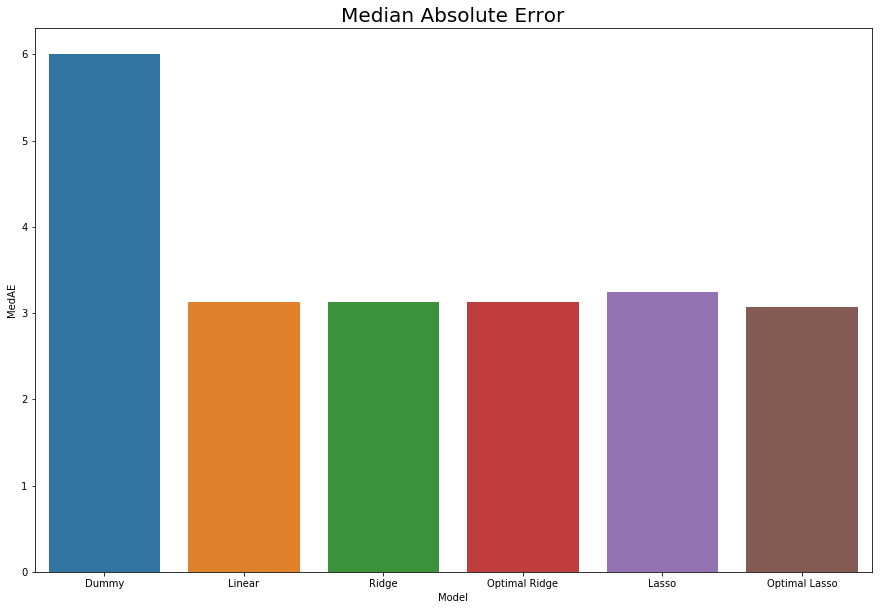

In [88]:
plt.figure(figsize=(15,10))
sns.barplot(x='Model', y='MedAE', data=error)
plt.title('Median Absolute Error', fontsize=20)

Text(0.5, 1.0, 'R2 Error')

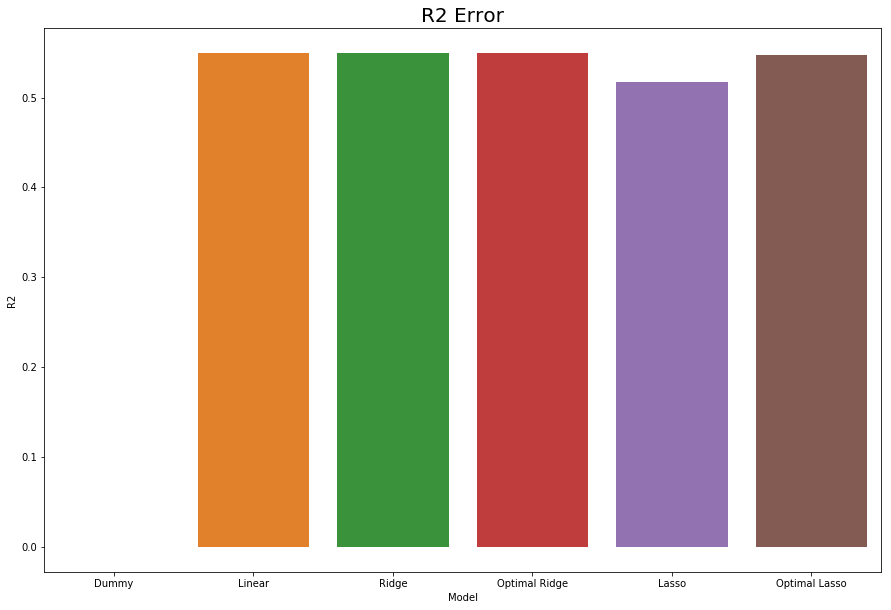

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(x='Model', y='R2', data=error)
plt.title('R2 Error', fontsize=20)